# results for the SPIE conference paper

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ossicles_6D_pose_estimation.tools import utils, vis_utils

In [18]:
def create_box_plot(data1, data2, data3, data4, output_path):
    # Random test data
    labels = ['x1', 'x2', 'x3', 'x4']

    plt.figure(figsize=(12, 6))

    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1])
    axs = [plt.subplot(gs[i]) for i in range(4)]

    colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']

    # rectangular box plot 1
    bplot1 = axs[0].boxplot(data1, vert=True, patch_artist=True, labels=[labels[0]])
    axs[0].set_title('Rotation error (°)')
    bplot1['boxes'][0].set_facecolor(colors[0])

    # rectangular box plot 2
    bplot2 = axs[1].boxplot(data2, vert=True, patch_artist=True, labels=[labels[1]])
    axs[1].set_title('Translate x error (mm)')
    bplot2['boxes'][0].set_facecolor(colors[1])

    # rectangular box plot 3
    bplot3 = axs[2].boxplot(data3, vert=True, patch_artist=True, labels=[labels[2]])
    axs[2].set_title('Translate y error (mm)')
    bplot3['boxes'][0].set_facecolor(colors[2])

    # rectangular box plot 4
    bplot4 = axs[3].boxplot(data4, vert=True, patch_artist=True, labels=[labels[3]])
    axs[3].set_title('Translate z error (%)')
    bplot4['boxes'][0].set_facecolor(colors[3])

    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_ylabel('Observed values')

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

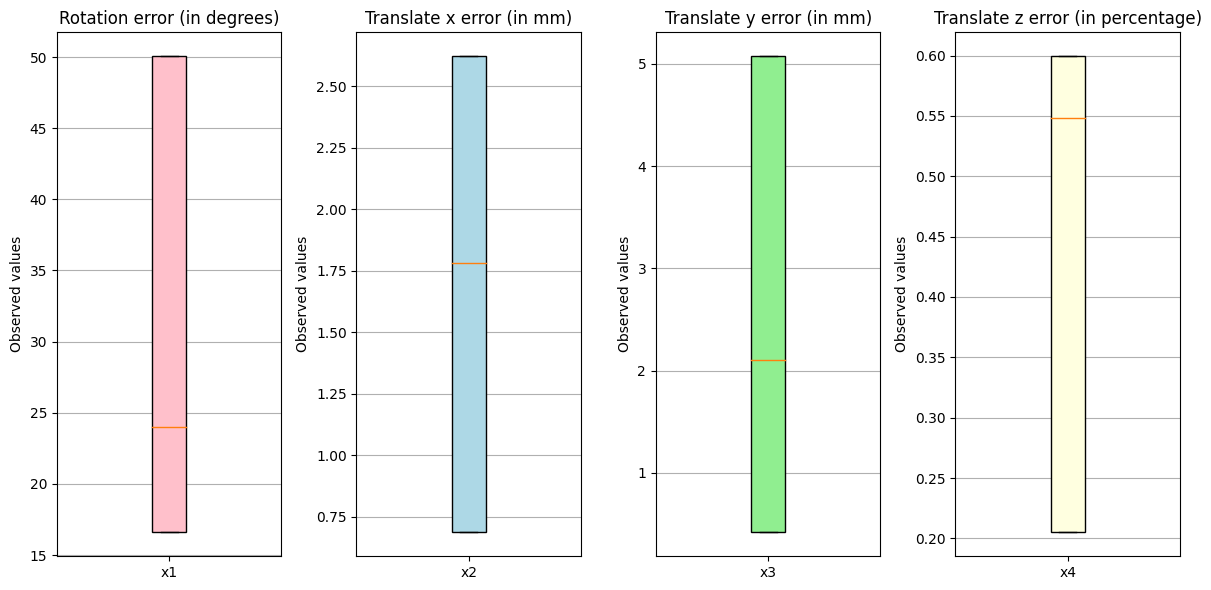

In [15]:
data_folder = Path(os.path.abspath("")).parent.parent / "data" / "output" / "differential_render" / "108_192" / "spie(12_samples)" / "2023-09-30-20-58-18_valid_best" / "fold_0" / "plots" / "box_plot" / "predict"
rot_error = np.load(data_folder / "predict_rot_errors.npy")
tx_error = np.load(data_folder / "predict_tx_errors.npy")
ty_error = np.load(data_folder / "predict_ty_errors.npy")
tz_error = np.load(data_folder / "predict_tz_errors.npy")

# utils.create_box_plot(rot_error, tx_error, ty_error, tz_error, data_folder / "box_plot_initial.png" )

tz_error_in_percent = (tz_error/50000) * 100

create_box_plot(rot_error, tx_error, ty_error, tz_error_in_percent, data_folder / "box_plot_refined.png" )


# Results for the SPIE conference poster

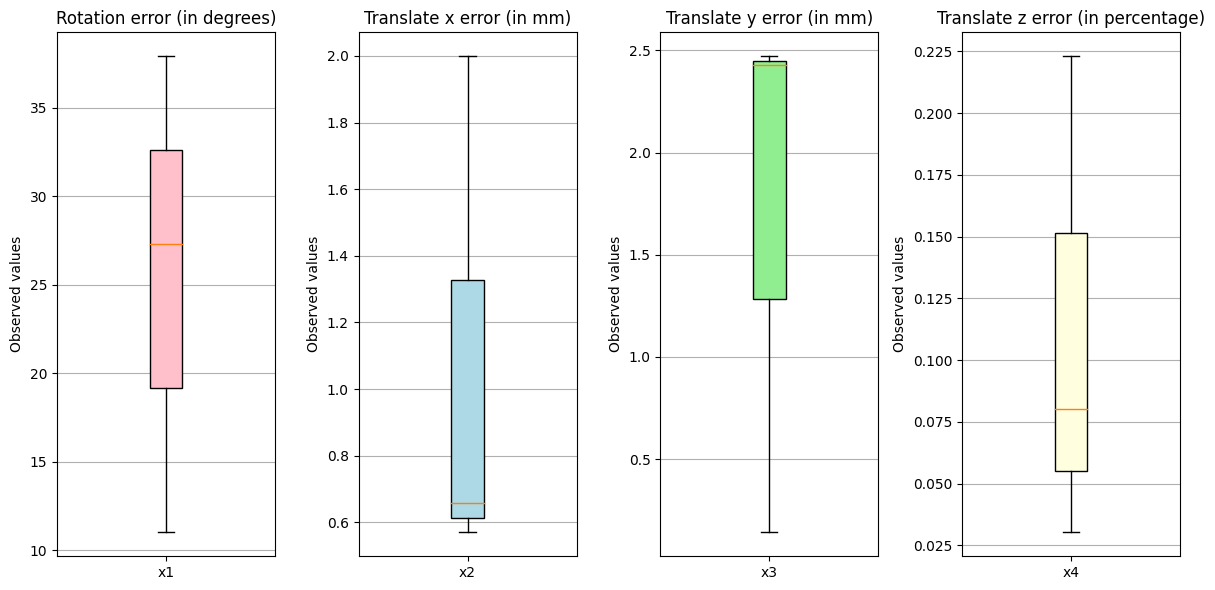

In [5]:
data_folder = Path(os.path.abspath("")).parent.parent / "data" / "output" / "differential_render" / "108_192" / "2023-11-15-17-49-32_valid_sample_best256" / "fold_0" / "plots" / "box_plot" / "predict"
rot_error = np.load(data_folder / "predict_rot_errors.npy")
tx_error = np.load(data_folder / "predict_tx_errors.npy")
ty_error = np.load(data_folder / "predict_ty_errors.npy")
tz_error = np.load(data_folder / "predict_tz_errors.npy")

# utils.create_box_plot(rot_error, tx_error, ty_error, tz_error, data_folder / "box_plot_initial.png" )

tz_error_in_percent = (100 * tz_error/10000)

create_box_plot(rot_error, tx_error, ty_error, tz_error_in_percent, data_folder / "box_plot_refined.png" )


In [1]:
predict_errors = []
predict_tx_errors = []
predict_ty_errors = []
predict_tz_errors = []
# for ossicles 489
optimized_pose_489 = np.array([[  0.09210526,  -0.83324528,   0.54517788,   7.57200909],
                        [ -0.1873416,   -0.55222857,  -0.81237108,  -1.89766252],
                        [  0.97796714,  -0.02731085,  -0.20696466, 144.20561218],
                        [  0.,           0.,           0.,           1.        ]])
gt_pose_489 = np.array([[  0.08480783,  -0.44437414,   0.89185154,   6.87152576],
                    [ -0.2183561,   -0.88160026,  -0.4185065,    0.28943604],
                    [  0.97216725,  -0.15923023,  -0.17184487, 129.92552185],
                    [  0.,           0.,           0.,           1.        ]]
)
angular_distance = vis_utils.angler_distance(optimized_pose_489[:3, :3], gt_pose_489[:3, :3])
translation_error = np.sqrt((optimized_pose_489[:3, 3] - gt_pose_489[:3, 3]) ** 2) # L2 norm for x, y, and z translation error specifically
predict_errors.append(angular_distance)
predict_tx_errors.append(translation_error[0])
predict_ty_errors.append(translation_error[1])
predict_tz_errors.append(translation_error[2])

# for ossicles 632
optimized_pose_632 = np.array([[  0.42841026,  -0.1986675,    0.88147378,   5.62565804],
                            [  0.41583064,  -0.82274234,  -0.38753086,   2.37058711],
                            [  0.8022154,    0.53256601,  -0.26985919, 209.32107544],
                            [  0.,           0.,           0.,           1.        ]])
gt_pose_632 = np.array([[ -0.29454237,  -0.3265115,    0.89814925,   2.92186451],
                    [  0.3784292,   -0.90283769,  -0.20413759,   1.28570163],
                    [  0.87749481,   0.27971992,   0.38951206, 217.95135498],
                    [  0.,           0.,           0.,           1.        ]]
)
angular_distance = vis_utils.angler_distance(optimized_pose_632[:3, :3], gt_pose_632[:3, :3])
translation_error = np.sqrt((optimized_pose_632[:3, 3] - gt_pose_632[:3, 3]) ** 2) # L2 norm for x, y, and z translation error specifically
predict_errors.append(angular_distance)
predict_tx_errors.append(translation_error[0])
predict_ty_errors.append(translation_error[1])
predict_tz_errors.append(translation_error[2])

# for ossicles 6602
optimized_pose_6602 = np.array([[  0.216721,    -0.21051911,   0.95326471,   6.11139631],
                            [  0.42624184,  -0.85807449,  -0.28640172,   0.12762098],
                            [  0.87826526,   0.46839058,  -0.09623072, 117.87837982],
                            [  0.,           0.,           0.,           1.        ]])
gt_pose_6602 = np.array([[  0.0475033,   -0.20822173,   0.97697264,   5.03700352],
                    [  0.39858502,  -0.89290375,  -0.20965707,   0.01794743],
                    [  0.91590428,   0.39934826,   0.04057216, 109.54266357],
                    [  0.,           0.,           0.,           1.        ]]
)
angular_distance = vis_utils.angler_distance(optimized_pose_6602[:3, :3], gt_pose_6602[:3, :3])
translation_error = np.sqrt((optimized_pose_6602[:3, 3] - gt_pose_6602[:3, 3]) ** 2) # L2 norm for x, y, and z translation error specifically
predict_errors.append(angular_distance)
predict_tx_errors.append(translation_error[0])
predict_ty_errors.append(translation_error[1])
predict_tz_errors.append(translation_error[2])

tz_error_in_percent = (100 * np.array(predict_tz_errors)/10000)
plt.rcParams.update({'font.size': 15})

print(predict_errors)
create_box_plot(predict_errors, predict_tx_errors, predict_ty_errors, tz_error_in_percent, data_folder / "box_plot_optimied.png" )

NameError: name 'np' is not defined